<a href="https://colab.research.google.com/github/Vaniotosta/Projeto-Data-Science/blob/main/Projeto_3_aprendizado_de_maquinaipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PROJETO  1- PREVISÃO DE VENDAS DE REDE DE SUPERMERCADO 

## INTRODUÇÃO
Um dos grandes desafios dos iniciantes em aprendizado de máquinas é entender as etapas da construção de um modelo.Sendo assim, este projeto tem o objetivo de construir um modelo de previsão de vendas, demonstrando as etapas do projeto de caráter educativo e de treinamento. O problema do negócio busca prever as quantidades de vendas por loja com base nos dados históricos que abrangem as vendas de 2010-02-05 a 2012-11-01, nos quais você encontrará os seguintes campos:

Loja - o número da loja

Data - a semana de vendas

Weekly_Sales - vendas para determinada loja

Holiday_Flag - se a semana é uma semana de feriado especial 1 – Semana de férias 0 – Semana sem feriado

Temperatura - Temperatura no dia da venda

Fuel_Price - Custo do combustível na região

IPC – Índice de preços ao consumidor prevalecente

Desemprego - Taxa de desemprego predominante


 Tal projeto tem como fonte de base de dados o arquivo disponibilizado no link https://www.kaggle.com/rutuspatel/walmart-sales-project/data . 

## ETAPAS DO PROJETO

1. Pesquisa e conhecimento dos dados
2. Análise exploratória dos dados (EDA) com objetivo de gerar insights
3. Pré-processamento e tratamento dos daddos
4. Análise exploratória para modelagem
5. Etapas da modelagem
6. Considerações Finais

In [ ]:
import pandas as pd # importando algumas biblotecas
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import dates
from datetime import datetime
import sklearn 
import seaborn as sns


In [ ]:
df=pd.read_csv("/content/Walmart_Store_sales.csv") # lendo arquivos
df.head()

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [ ]:
df.info() # busca informaçoes preliminares do dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
df.isnull().mean() # verificando dados nulos

Store           0.0
Date            0.0
Weekly_Sales    0.0
Holiday_Flag    0.0
Temperature     0.0
Fuel_Price      0.0
CPI             0.0
Unemployment    0.0
dtype: float64

In [ ]:
df['Date'] =  pd.to_datetime(df['Date']) # transformando date no formato de data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [ ]:
df["Day"]= pd.DatetimeIndex(df['Date']).day   # separando dia, mês e ano no dataframe
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Year'] = pd.DatetimeIndex(df['Date']).year
df

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1 2010-05-02    1643690.90             0        42.31       2.572   
1         1 2010-12-02    1641957.44             1        38.51       2.548   
2         1 2010-02-19    1611968.17             0        39.93       2.514   
3         1 2010-02-26    1409727.59             0        46.63       2.561   
4         1 2010-05-03    1554806.68             0        46.50       2.625   
...     ...        ...           ...           ...          ...         ...   
6430     45 2012-09-28     713173.95             0        64.88       3.997   
6431     45 2012-05-10     733455.07             0        64.89       3.985   
6432     45 2012-12-10     734464.36             0        54.47       4.000   
6433     45 2012-10-19     718125.53             0        56.47       3.969   
6434     45 2012-10-26     760281.43             0        58.85       3.882   

             CPI  Unemployment  Day  Month  Year  
0     211.096358         8.106    2      5  2010  
1     211.242170         8.106    2     12  2010  
2     211.289143         8.106   19      2  2010  
3     211.319643         8.106   26      2  2010  
4     211.350143         8.106    3      5  2010  
...          ...           ...  ...    ...   ...  
6430  192.013558         8.684   28      9  2012  
6431  192.170412         8.667   10      5  2012  
6432  192.327265         8.667   10     12  2012  
6433  192.330854         8.667   19     10  2012  
6434  192.308899         8.667   26     10  2012  

[6435 rows x 11 columns]

In [ ]:
df.rename(columns={'Store': 'loja',                                # subtituindo nome das colunas 
                           'Weekly_Sales': 'venda_semanais_l',
                    'Holiday_Flag':'feriado_SN',
                     'Fuel_Price':'preco_conb',
                     'CPI': 'Indec_preco_consumidor',
                   'Unemployment': 'taxa_desemprego'},inplace=True)
df


loja       Date  venda_semanais_l  feriado_SN  Temperature  preco_conb  \
0        1 2010-05-02        1643690.90           0        42.31       2.572   
1        1 2010-12-02        1641957.44           1        38.51       2.548   
2        1 2010-02-19        1611968.17           0        39.93       2.514   
3        1 2010-02-26        1409727.59           0        46.63       2.561   
4        1 2010-05-03        1554806.68           0        46.50       2.625   
...    ...        ...               ...         ...          ...         ...   
6430    45 2012-09-28         713173.95           0        64.88       3.997   
6431    45 2012-05-10         733455.07           0        64.89       3.985   
6432    45 2012-12-10         734464.36           0        54.47       4.000   
6433    45 2012-10-19         718125.53           0        56.47       3.969   
6434    45 2012-10-26         760281.43           0        58.85       3.882   

      Indec_preco_consumidor  taxa_desemprego  Day  Month  Year  
0                 211.096358            8.106    2      5  2010  
1                 211.242170            8.106    2     12  2010  
2                 211.289143            8.106   19      2  2010  
3                 211.319643            8.106   26      2  2010  
4                 211.350143            8.106    3      5  2010  
...                      ...              ...  ...    ...   ...  
6430              192.013558            8.684   28      9  2012  
6431              192.170412            8.667   10      5  2012  
6432              192.327265            8.667   10     12  2012  
6433              192.330854            8.667   19     10  2012  
6434              192.308899            8.667   26     10  2012  

[6435 rows x 11 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   loja                    6435 non-null   int64         
 1   Date                    6435 non-null   datetime64[ns]
 2   venda_semanais_l        6435 non-null   float64       
 3   feriado_SN              6435 non-null   int64         
 4   Temperature             6435 non-null   float64       
 5   preco_conb              6435 non-null   float64       
 6   Indec_preco_consumidor  6435 non-null   float64       
 7   taxa_desemprego         6435 non-null   float64       
 8   Day                     6435 non-null   int64         
 9   Month                   6435 non-null   int64         
 10  Year                    6435 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(5)
memory usage: 553.1 KB


## **EDA-ANÁLISE  EXPLORÁTÓRIA** 

In [ ]:
df['venda_semanais_l']. mean() # média de vendas semanais

1046964.8775617732

 **RESUMO** gráfico abaixo relata que a loja 20 concentra o maior número de vendas por semana, enquanto que a loja de 33 possui as menores vendas por semana.

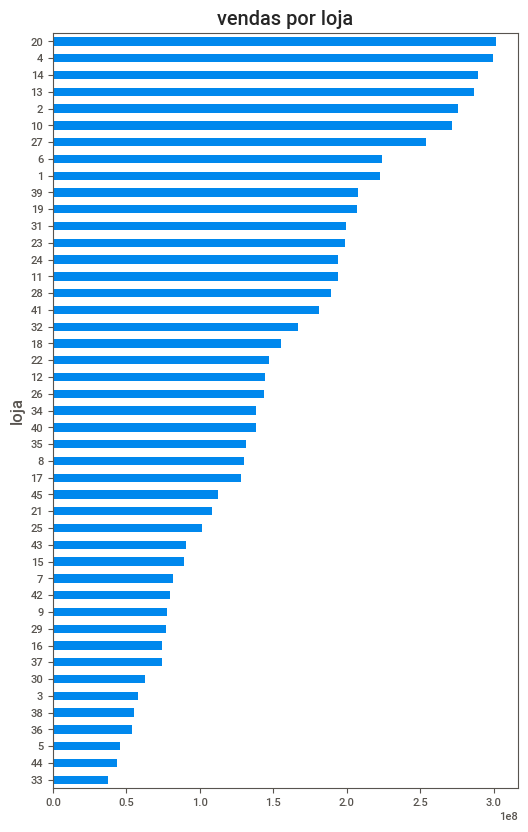

In [ ]:
df.groupby('loja')['venda_semanais_l'].sum().sort_values().plot(kind = 'barh', figsize=(6,10),title='vendas por loja'); 

**RESUMO** [No gráfico abaixo;](https://) Os dias específicos não impacta diretamente nas vendas semanais. ou seja , a relação dias/vendas tem pouca influência nas decisões de vendas

---



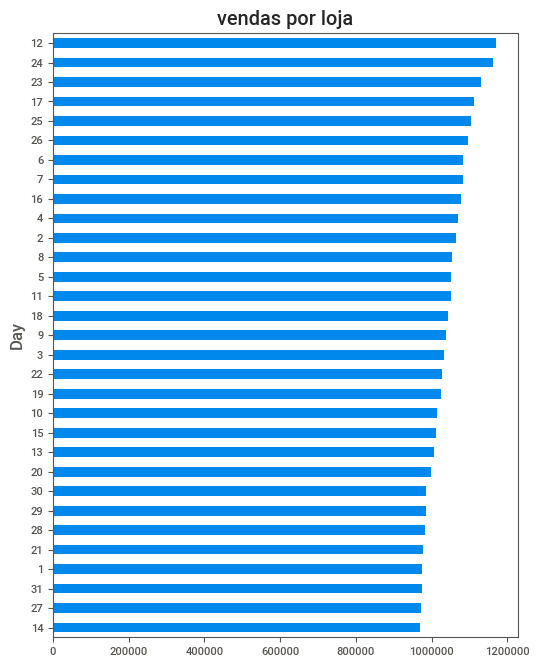

In [ ]:
df.groupby('Day')['venda_semanais_l'].mean().sort_values().plot(kind = 'barh', figsize=(6,8),title='vendas por loja'); 

**RESUMO** [No gráfico abaixo; Destaca=se o mês 11 e 12 com leve aumento nas vendas semanais com relação aos outros meses!

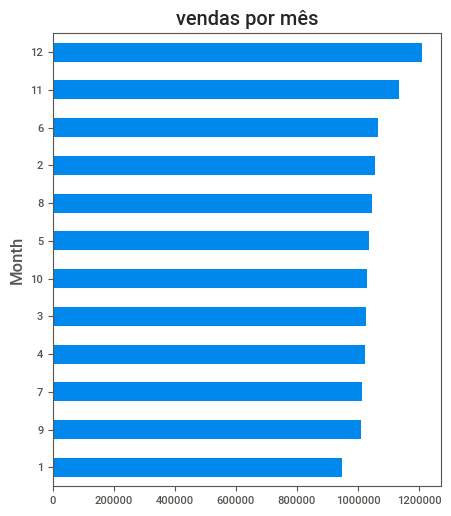

In [ ]:
df.groupby('Month')['venda_semanais_l'].mean().sort_values().plot(kind = 'barh', figsize=(5,6),title='vendas por mês'); 

 O gráfico abaixo demonstra que as compras semanais se concentram entre taxa de desempregos de 7% a 9%. Isso significa que a empregabilidade interfere nas vendas.Sendo assim, é importante concentrar atenção nas taxas de desempregos que geram rresultados positivos, tendo as oscilações uma forma de prevenção em relação às vendas.


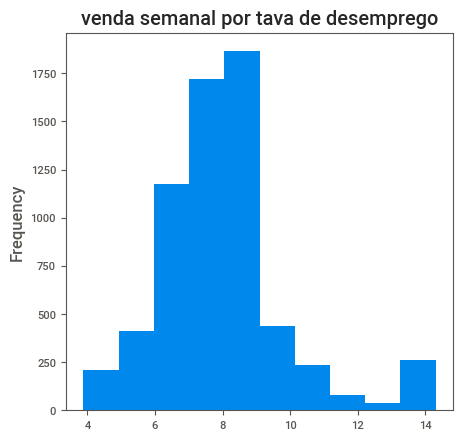

In [ ]:
df.groupby('venda_semanais_l')['taxa_desemprego'].mean().sort_values() .plot(kind = 'hist', figsize=(5,5),title='venda semanal por tava de desemprego'); 

**RESUMO** No grafico abaixo, ficou bem claro que a maioria das compras foram feitas no periodo sem feriados.Tal resultado requer melhor atenção por parte do setor de Marketing com relação às campanhas voltadas aos feriados.

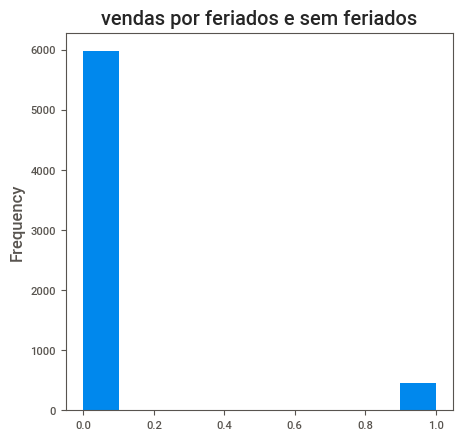

In [ ]:
df.groupby('venda_semanais_l')['feriado_SN'].mean().sort_values() .plot(kind = 'hist', figsize=(5,5),title='vendas por feriados e sem feriados'); 

 **RESUMO** [No gráfico abaixo;As vendas semanais comparadas entre os anos de 2010 a 2012 foram equilibradas

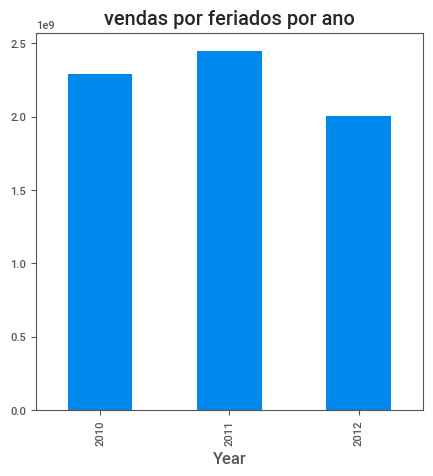

In [ ]:
df.groupby("Year")[["venda_semanais_l"]].sum().plot(kind='bar', figsize=(5,5),title='vendas por feriados por ano',legend=False);

## **PRÉ-PROCESSAMENTO** 

1-O **preço dos combustiveis** tem relação forte com a variavel **ano**,

2 assim como o **feriado_SN** com relaçao á variavel **mês**,

3 Existe relação forte **taxa de desemprego** com **loja**

Obs; Essas relações fortes quer dizer que uma variável impacta diretamente na outra.

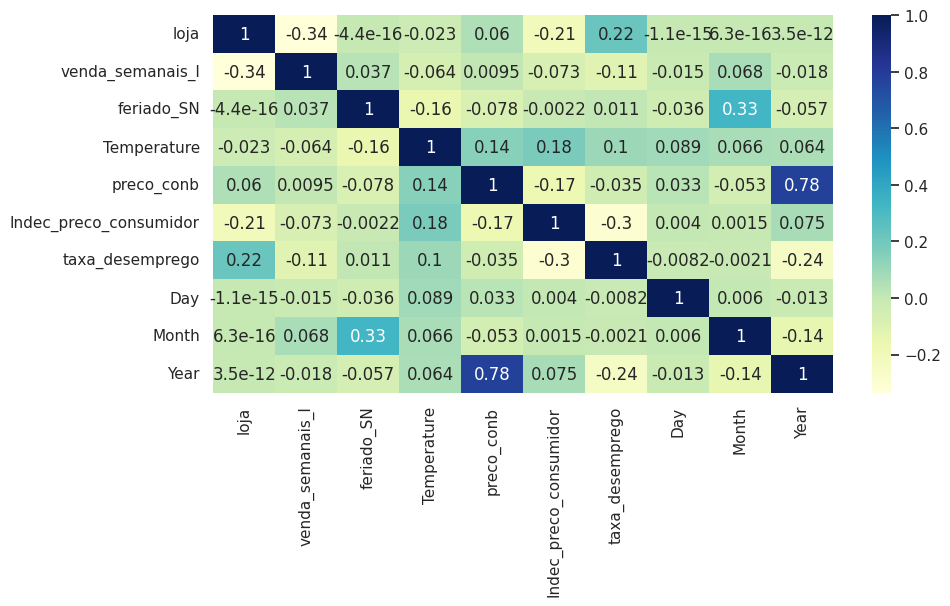

In [ ]:
# definindo mapa de correlação
x=df.corr( )
sns.set(rc = {'figure.figsize':(10,5)})
sns.heatmap(x, annot=True, cmap="YlGnBu");


O gráfico abaixo aoresenta outilier a ser tratados nas variáveis temperatura e taxa de desemprego

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

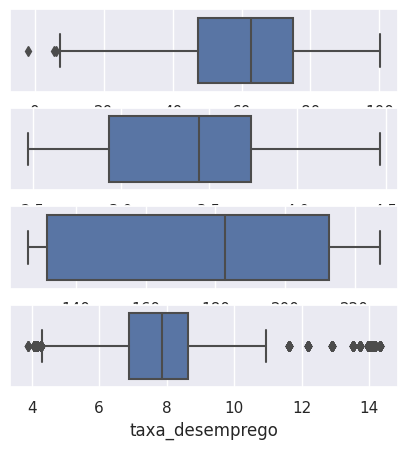

In [ ]:
fig, axis = plt.subplots(4,figsize=(5,5)) # identificando outiliers
X = df[['Temperature','preco_conb','Indec_preco_consumidor','taxa_desemprego']]
for i,column in enumerate(X):
    sns.boxplot(df[column],ax=axis[i])

Logo abaixo foram tratados os outlier apresentados mas variaveis temperatura e taxa de desempregos

In [ ]:
# tratando outileirs
df_clean = df[(df['taxa_desemprego']<10) & (df['taxa_desemprego']>4.5) & (df['Temperature']>10)]
df_clean


loja       Date  venda_semanais_l  feriado_SN  Temperature  preco_conb  \
0        1 2010-05-02        1643690.90           0        42.31       2.572   
1        1 2010-12-02        1641957.44           1        38.51       2.548   
2        1 2010-02-19        1611968.17           0        39.93       2.514   
3        1 2010-02-26        1409727.59           0        46.63       2.561   
4        1 2010-05-03        1554806.68           0        46.50       2.625   
...    ...        ...               ...         ...          ...         ...   
6430    45 2012-09-28         713173.95           0        64.88       3.997   
6431    45 2012-05-10         733455.07           0        64.89       3.985   
6432    45 2012-12-10         734464.36           0        54.47       4.000   
6433    45 2012-10-19         718125.53           0        56.47       3.969   
6434    45 2012-10-26         760281.43           0        58.85       3.882   

      Indec_preco_consumidor  taxa_desemprego  Day  Month  Year  
0                 211.096358            8.106    2      5  2010  
1                 211.242170            8.106    2     12  2010  
2                 211.289143            8.106   19      2  2010  
3                 211.319643            8.106   26      2  2010  
4                 211.350143            8.106    3      5  2010  
...                      ...              ...  ...    ...   ...  
6430              192.013558            8.684   28      9  2012  
6431              192.170412            8.667   10      5  2012  
6432              192.327265            8.667   10     12  2012  
6433              192.330854            8.667   19     10  2012  
6434              192.308899            8.667   26     10  2012  

[5658 rows x 11 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

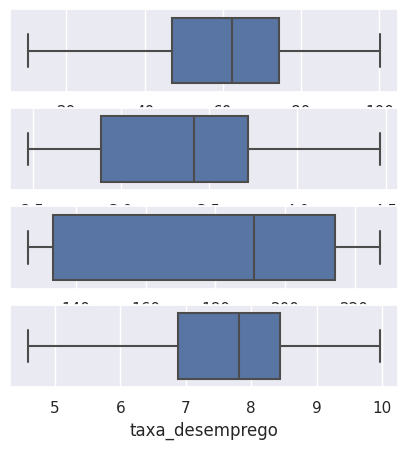

In [ ]:
# Confirmando a retirada dos outiliers

fig, axis = plt.subplots(4,figsize=(5,5)) # identificando outiliers
X = df_clean[['Temperature','preco_conb','Indec_preco_consumidor','taxa_desemprego']]
for i,column in enumerate(X):
    sns.boxplot(df_clean[column],ax=axis[i])

In [ ]:
df_clean # verificação dos dados para confirmação

loja       Date  venda_semanais_l  feriado_SN  Temperature  preco_conb  \
0        1 2010-05-02        1643690.90           0        42.31       2.572   
1        1 2010-12-02        1641957.44           1        38.51       2.548   
2        1 2010-02-19        1611968.17           0        39.93       2.514   
3        1 2010-02-26        1409727.59           0        46.63       2.561   
4        1 2010-05-03        1554806.68           0        46.50       2.625   
...    ...        ...               ...         ...          ...         ...   
6430    45 2012-09-28         713173.95           0        64.88       3.997   
6431    45 2012-05-10         733455.07           0        64.89       3.985   
6432    45 2012-12-10         734464.36           0        54.47       4.000   
6433    45 2012-10-19         718125.53           0        56.47       3.969   
6434    45 2012-10-26         760281.43           0        58.85       3.882   

      Indec_preco_consumidor  taxa_desemprego  Day  Month  Year  
0                 211.096358            8.106    2      5  2010  
1                 211.242170            8.106    2     12  2010  
2                 211.289143            8.106   19      2  2010  
3                 211.319643            8.106   26      2  2010  
4                 211.350143            8.106    3      5  2010  
...                      ...              ...  ...    ...   ...  
6430              192.013558            8.684   28      9  2012  
6431              192.170412            8.667   10      5  2012  
6432              192.327265            8.667   10     12  2012  
6433              192.330854            8.667   19     10  2012  
6434              192.308899            8.667   26     10  2012  

[5658 rows x 11 columns]

Logo abaixo foram normatizads as escalas para ser trabalhadas de forma harmonica com o modelo

In [ ]:
# Normatizando as variáveis
df_clean['venda_semanais_l'] = df_clean['venda_semanais_l']/100000
df_clean['Indec_preco_consumidor'] = df_clean['Indec_preco_consumidor']/100
#df_clean..drop(['Date'], axis= 1, inplace= True)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df_clean.drop(['Date'], axis=1, inplace= True) # aqui doi excluida a variavel data
df_clean

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


loja  venda_semanais_l  feriado_SN  Temperature  preco_conb  \
0        1         16.436909           0        42.31       2.572   
1        1         16.419574           1        38.51       2.548   
2        1         16.119682           0        39.93       2.514   
3        1         14.097276           0        46.63       2.561   
4        1         15.548067           0        46.50       2.625   
...    ...               ...         ...          ...         ...   
6430    45          7.131739           0        64.88       3.997   
6431    45          7.334551           0        64.89       3.985   
6432    45          7.344644           0        54.47       4.000   
6433    45          7.181255           0        56.47       3.969   
6434    45          7.602814           0        58.85       3.882   

      Indec_preco_consumidor  taxa_desemprego  Day  Month  Year  
0                   2.110964            8.106    2      5  2010  
1                   2.112422            8.106    2     12  2010  
2                   2.112891            8.106   19      2  2010  
3                   2.113196            8.106   26      2  2010  
4                   2.113501            8.106    3      5  2010  
...                      ...              ...  ...    ...   ...  
6430                1.920136            8.684   28      9  2012  
6431                1.921704            8.667   10      5  2012  
6432                1.923273            8.667   10     12  2012  
6433                1.923309            8.667   19     10  2012  
6434                1.923089            8.667   26     10  2012  

[5658 rows x 10 columns]

In [ ]:
df_clean.info() # Aqui verificamos informações dos dados

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5658 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loja                    5658 non-null   int64  
 1   venda_semanais_l        5658 non-null   float64
 2   feriado_SN              5658 non-null   int64  
 3   Temperature             5658 non-null   float64
 4   preco_conb              5658 non-null   float64
 5   Indec_preco_consumidor  5658 non-null   float64
 6   taxa_desemprego         5658 non-null   float64
 7   Day                     5658 non-null   int64  
 8   Month                   5658 non-null   int64  
 9   Year                    5658 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 486.2 KB


#**EDA PARA MODELAGEM**

In [ ]:
!pip install sweetviz  #importação de bibliotecas para EDA
import seaborn as sns
import numpy as np
import sweetviz as sv

                                             |          | [  0%]   00:00 -> (? left)


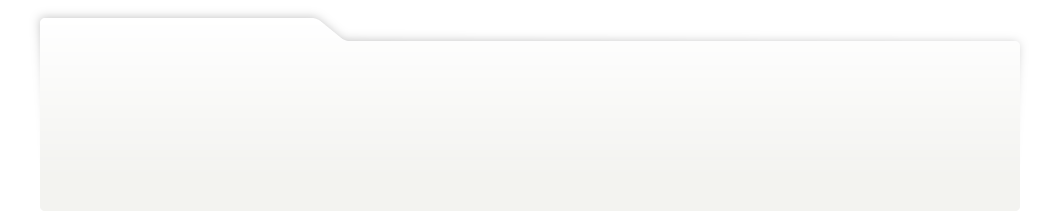
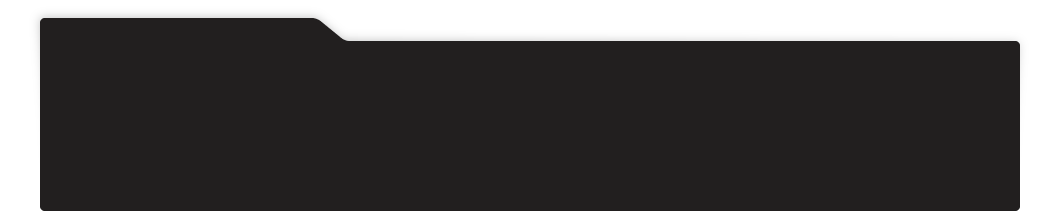
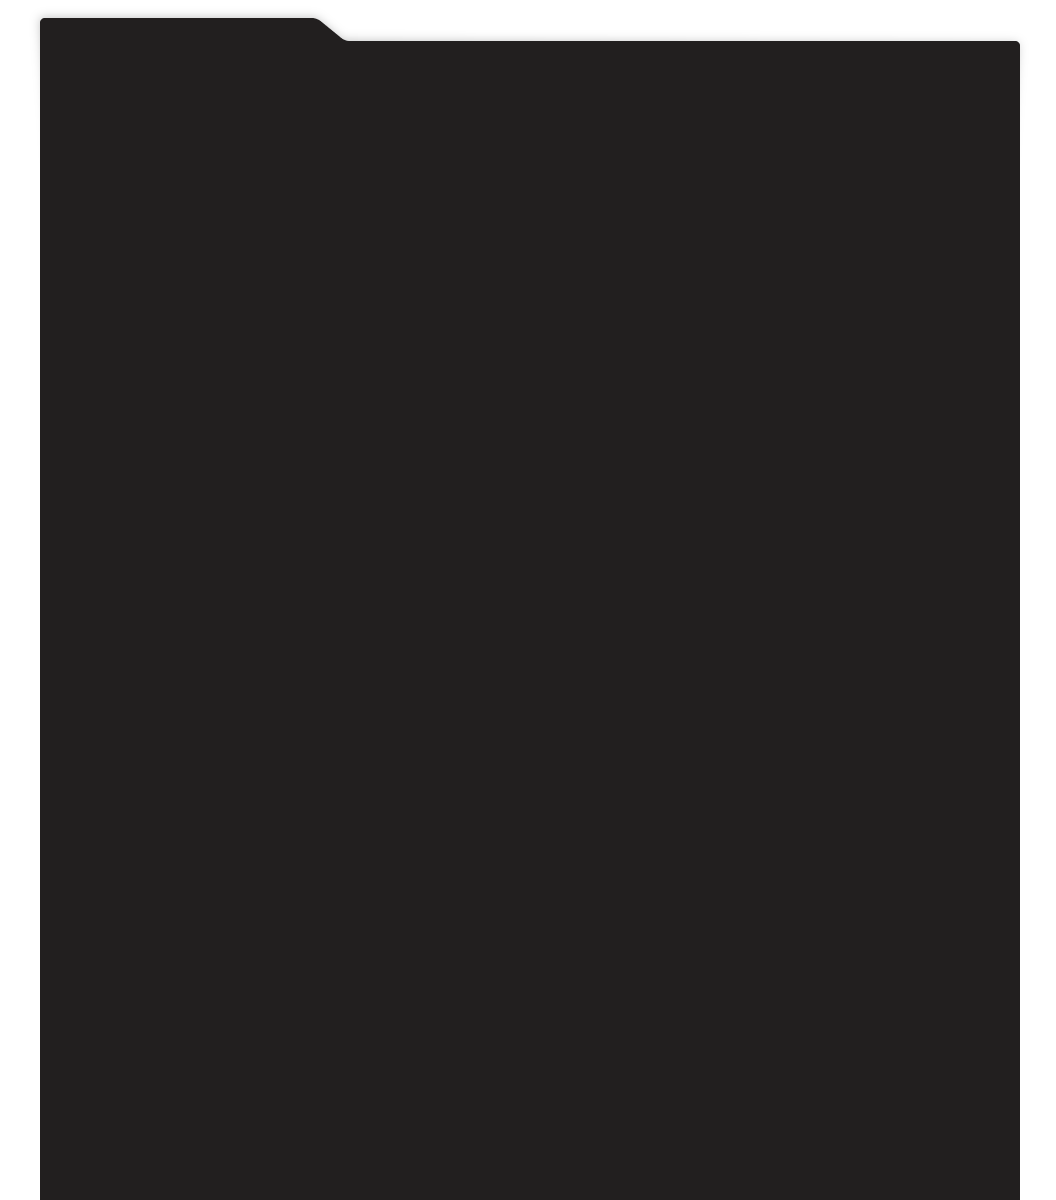
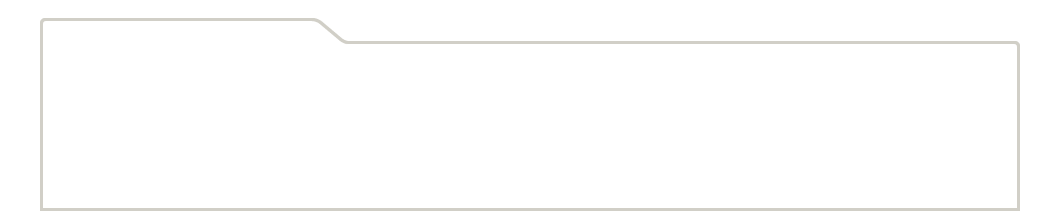
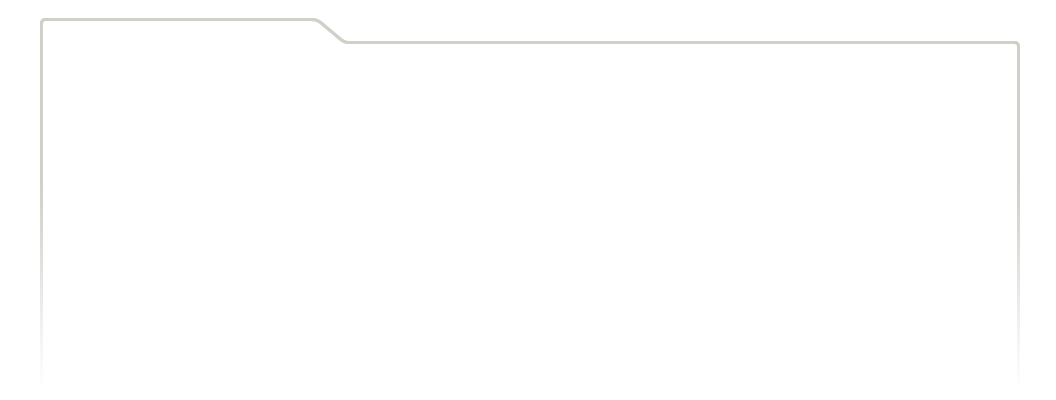
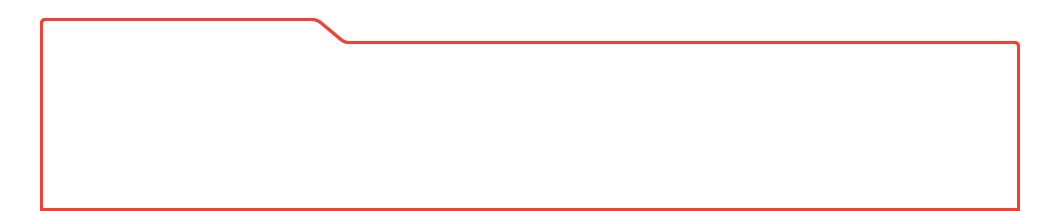
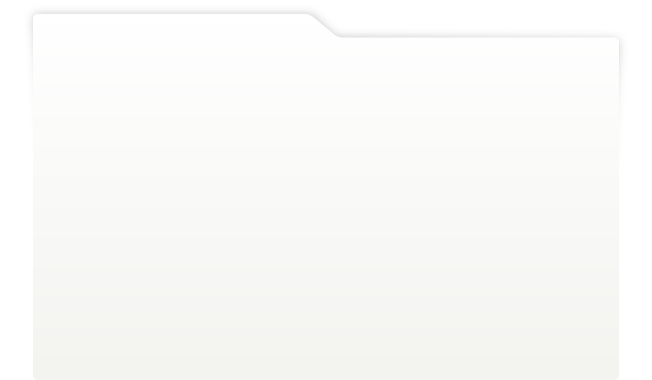
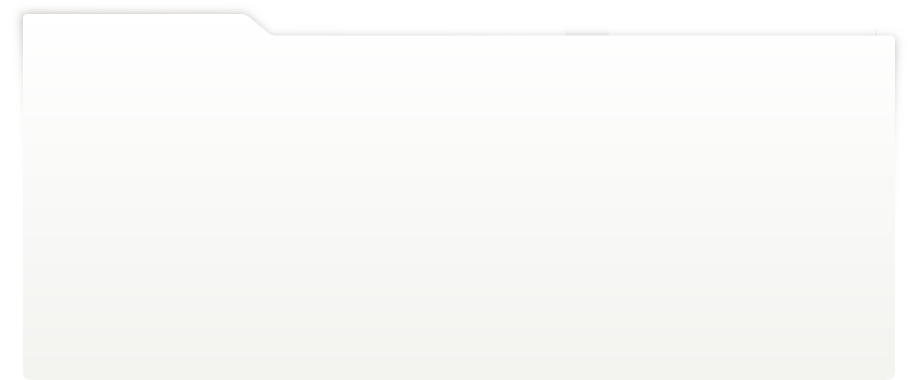
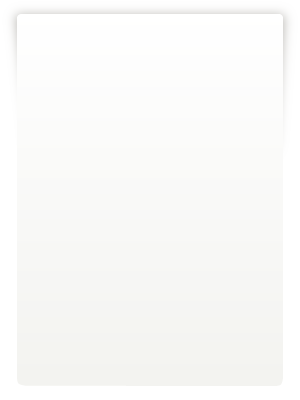
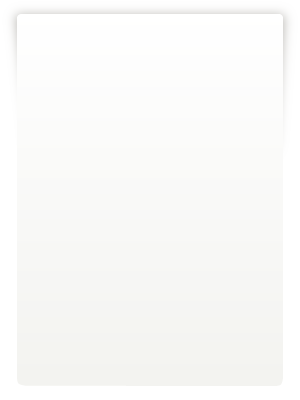
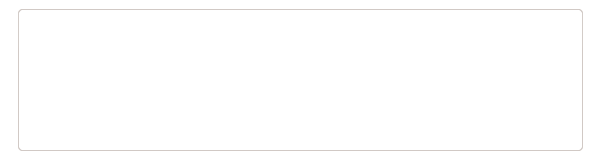
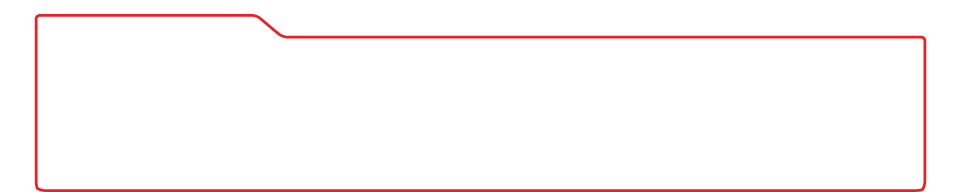
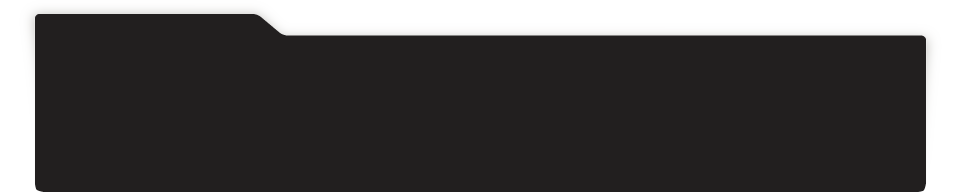
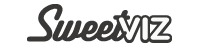
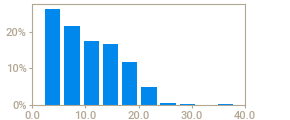
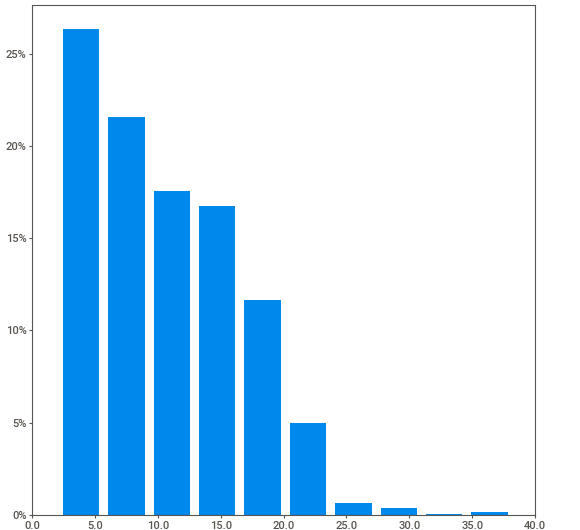
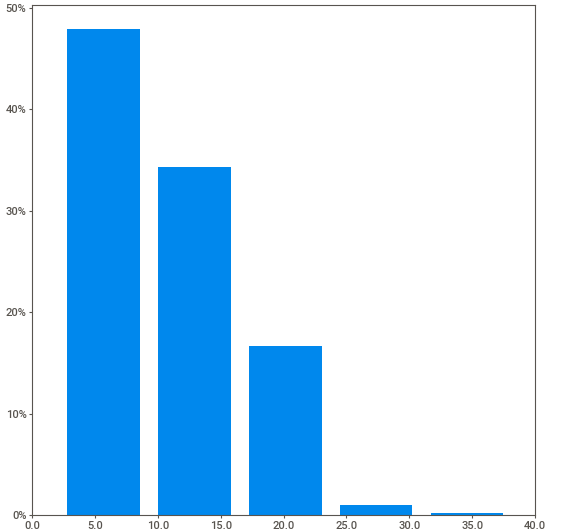
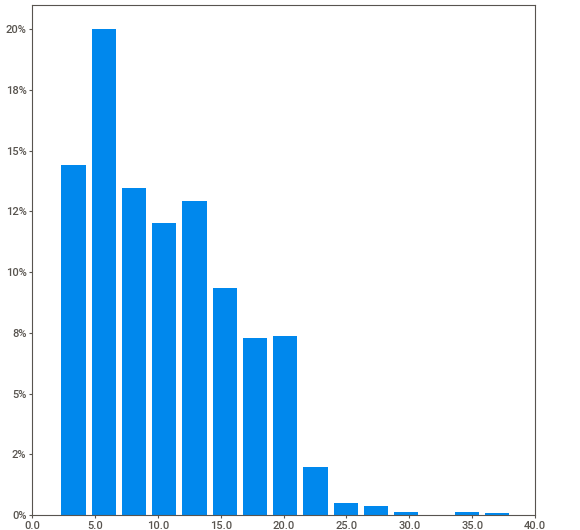
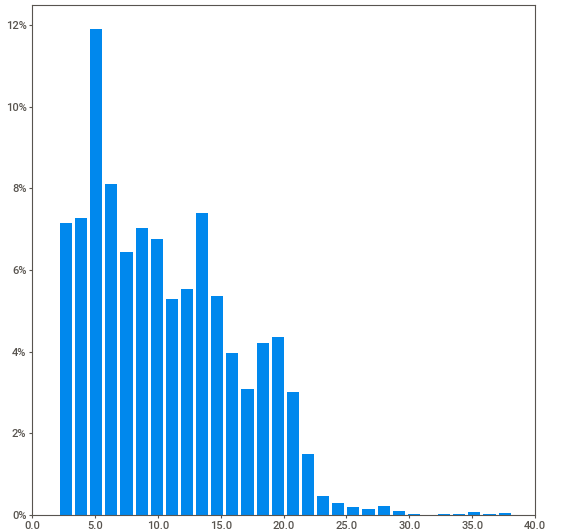
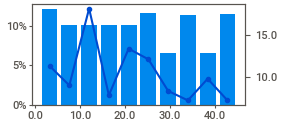
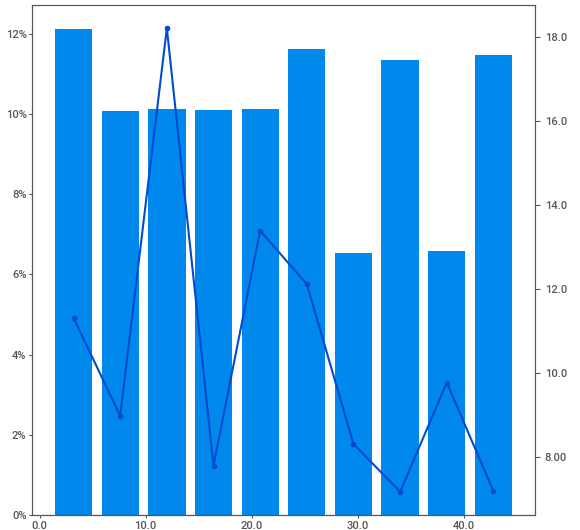
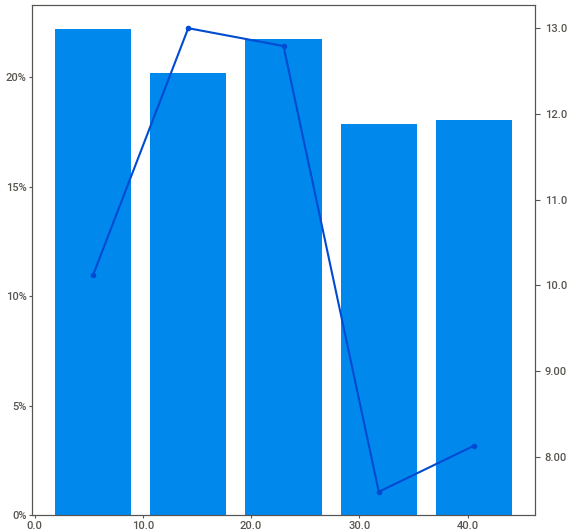
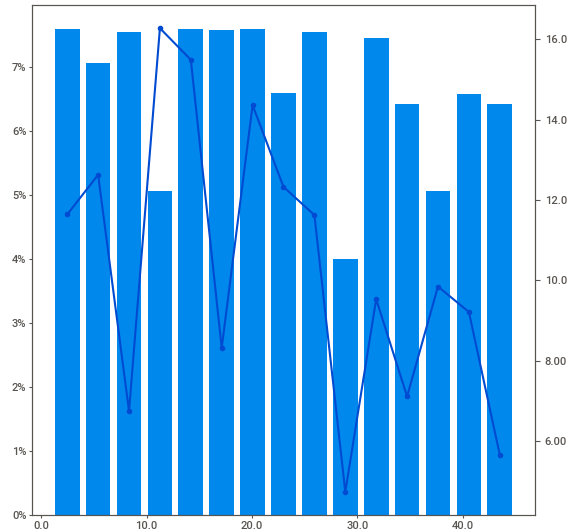
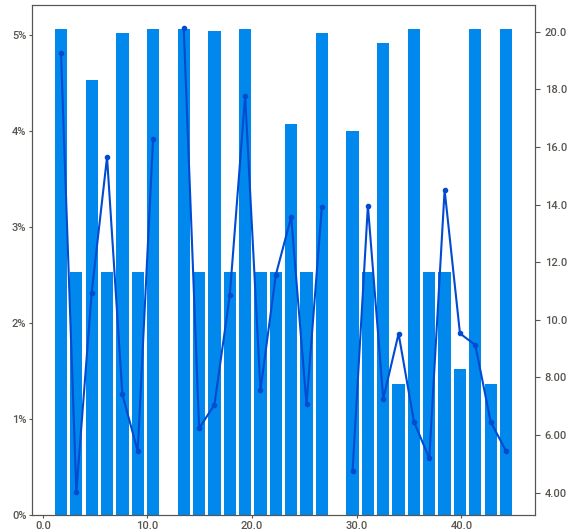
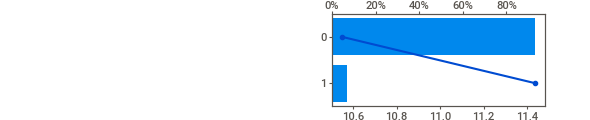
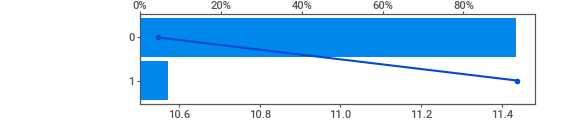
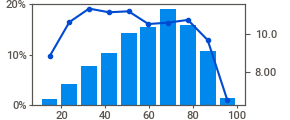
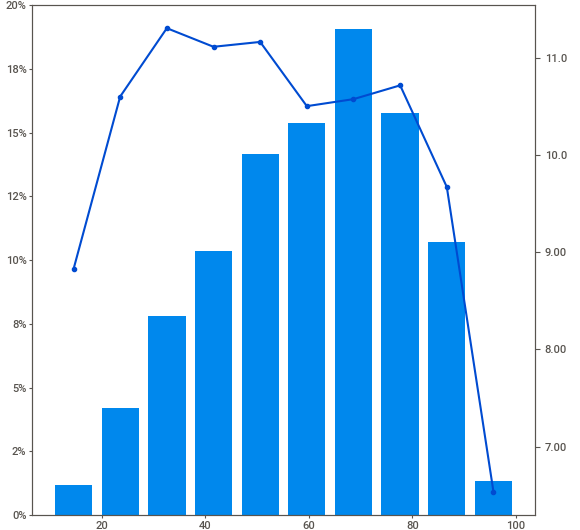
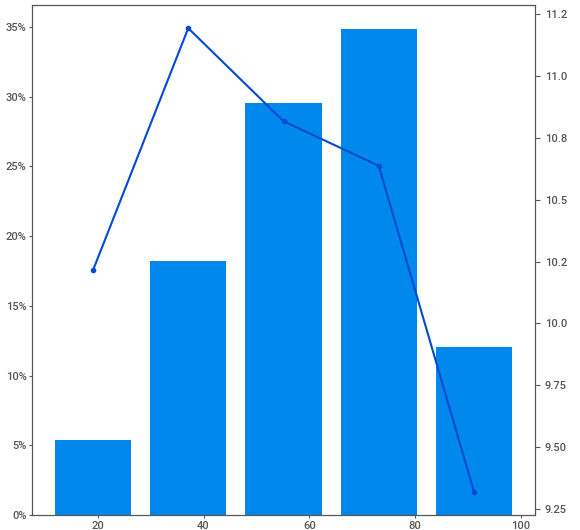
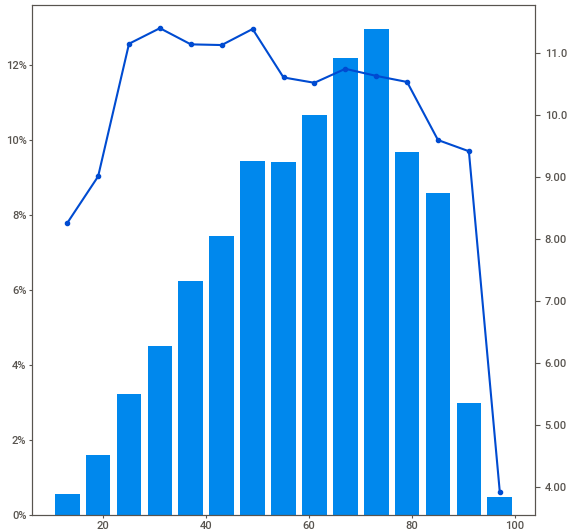
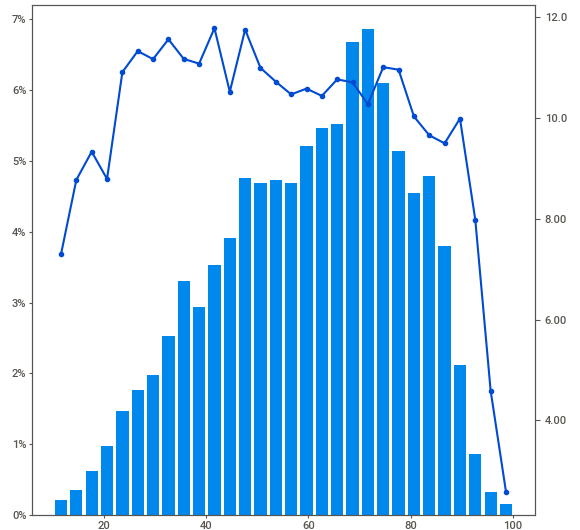
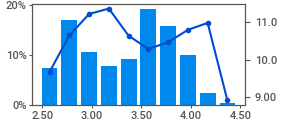
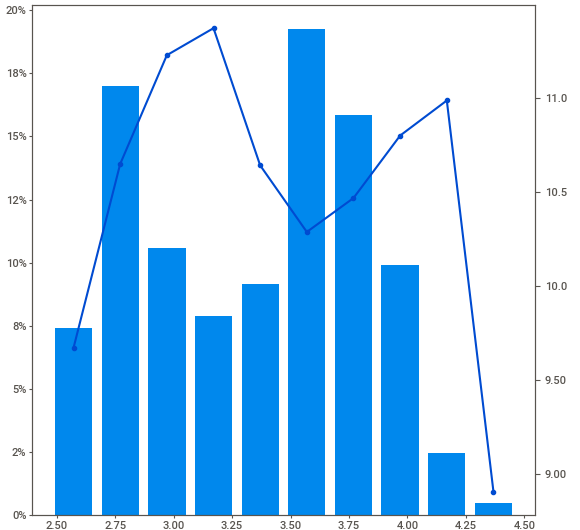
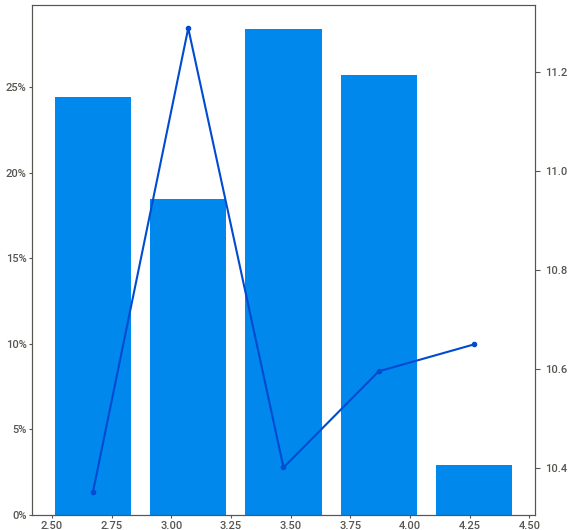
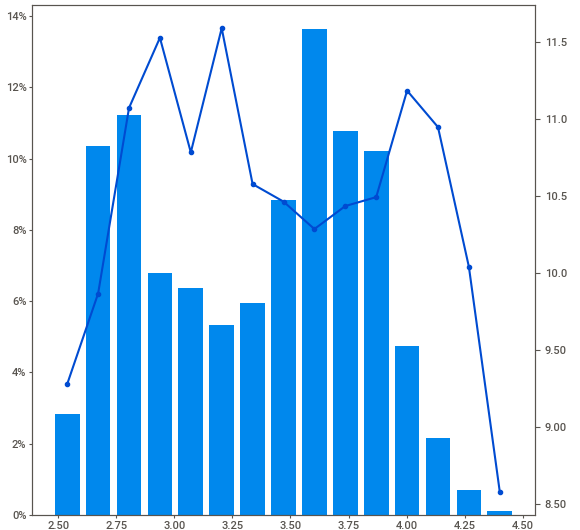
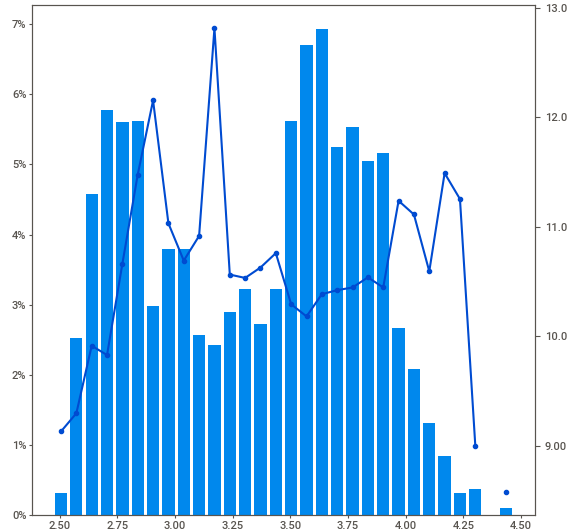
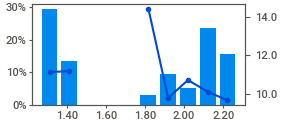
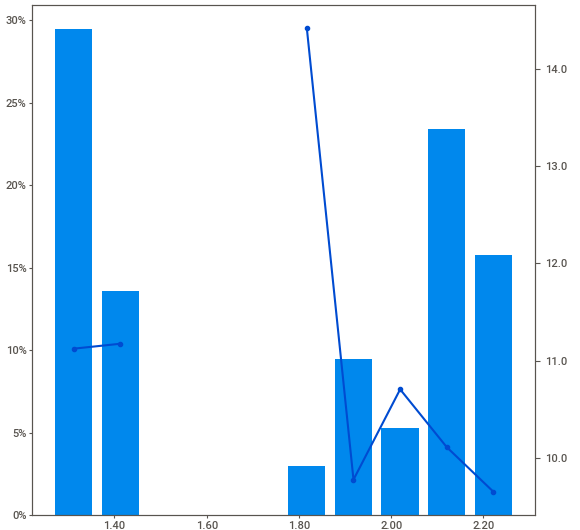
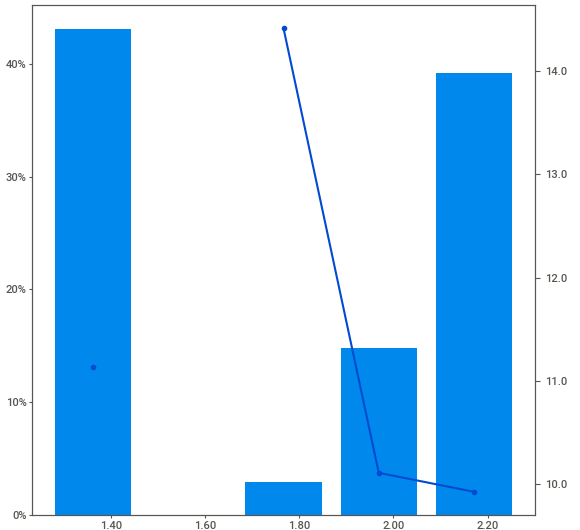
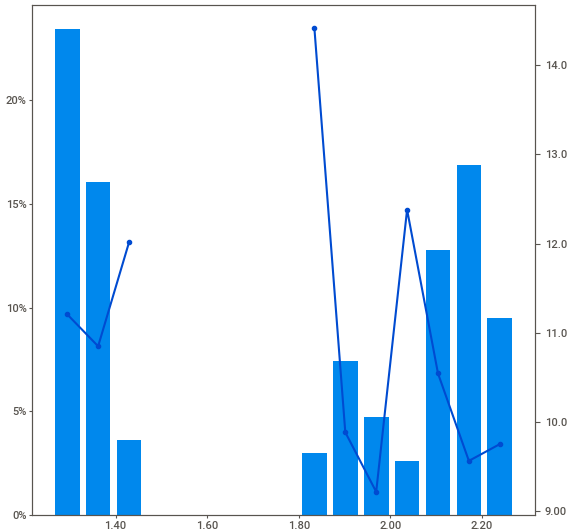
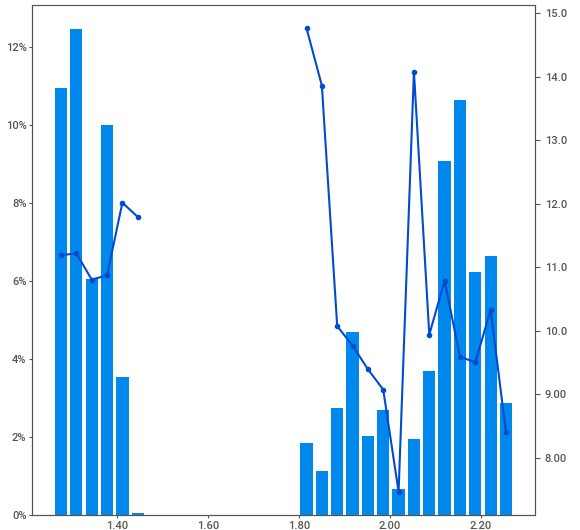
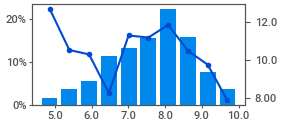
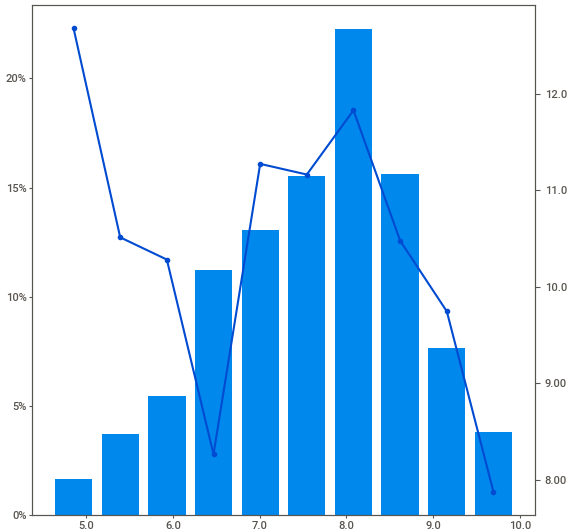
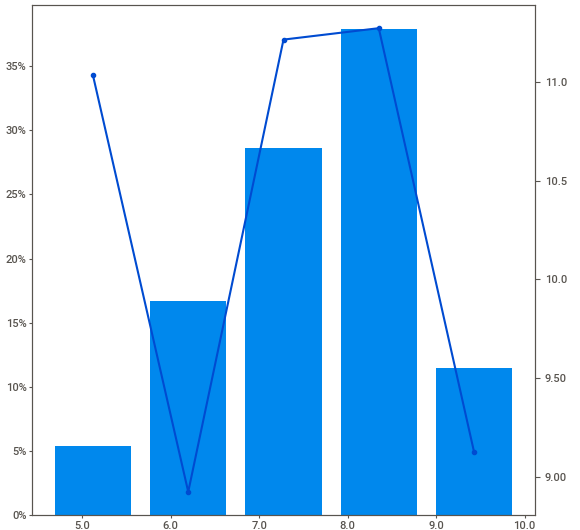
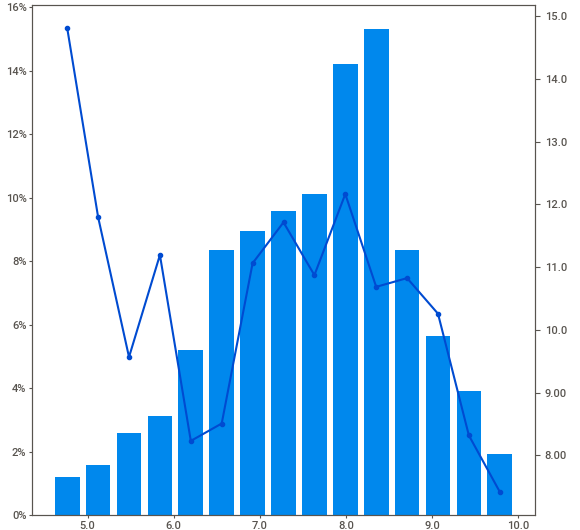
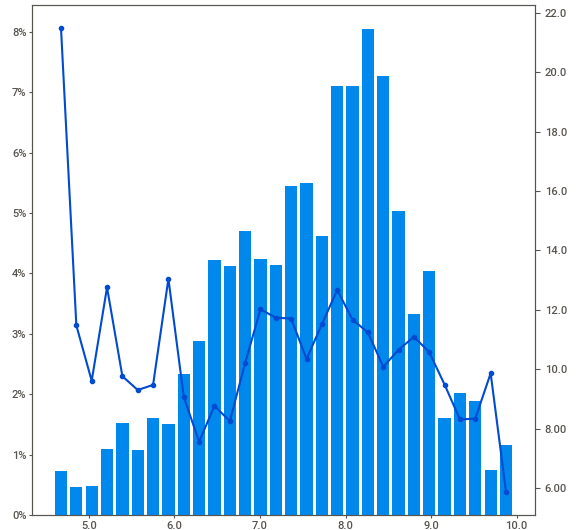
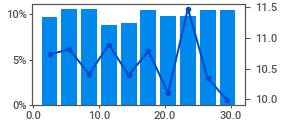
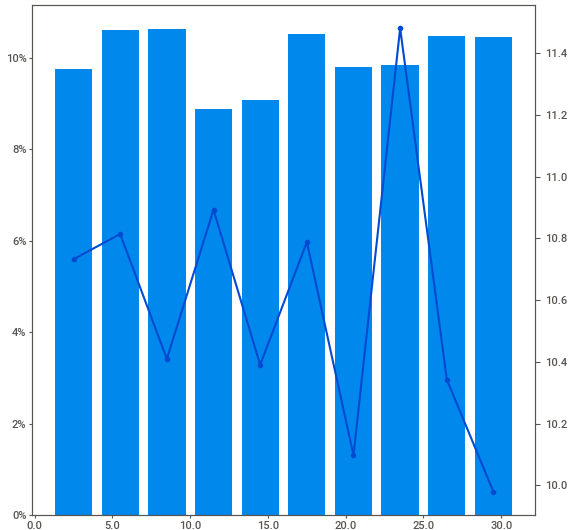
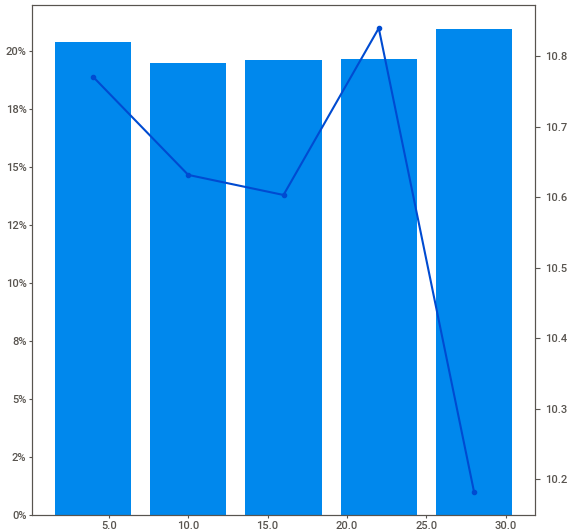
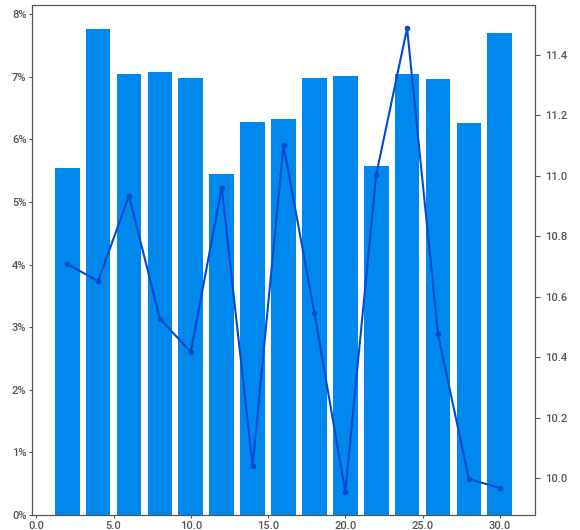
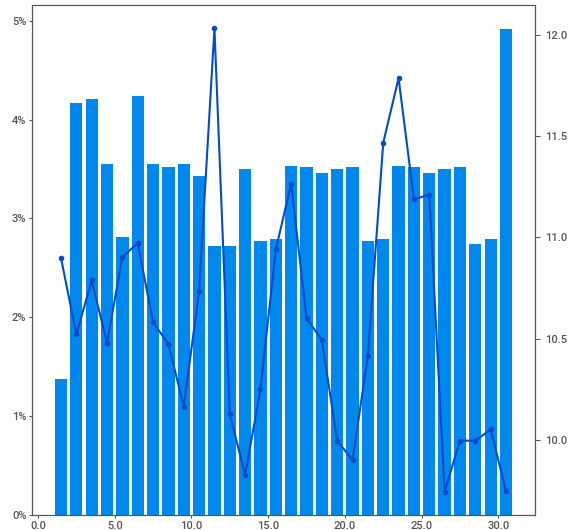
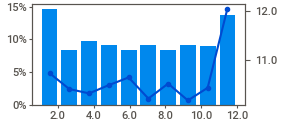
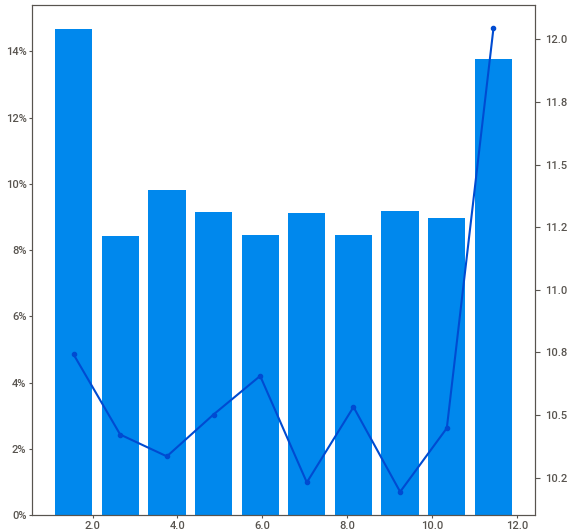
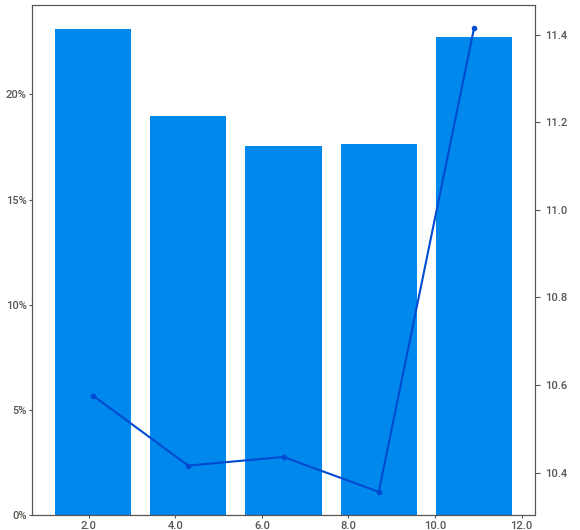
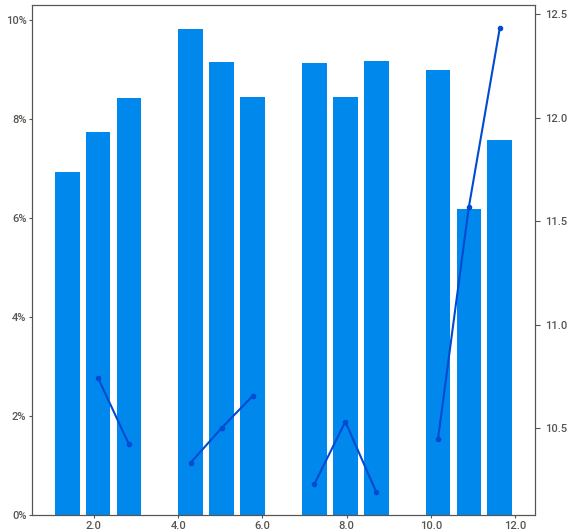
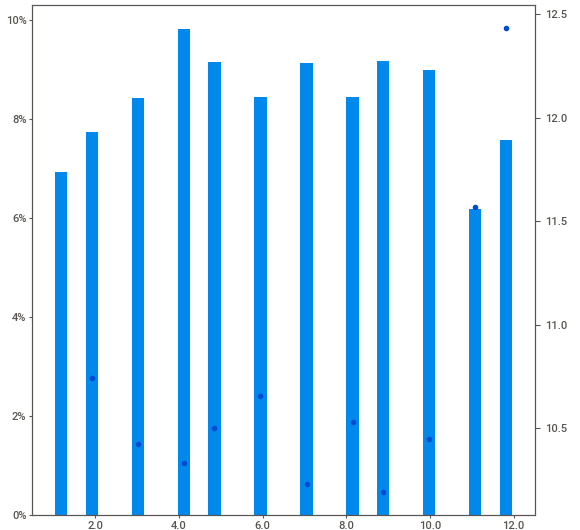
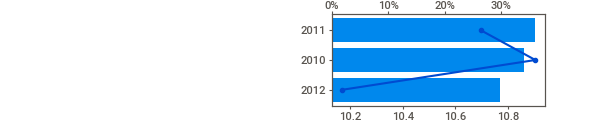
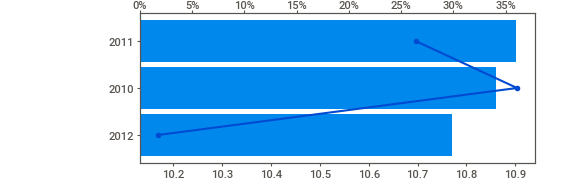
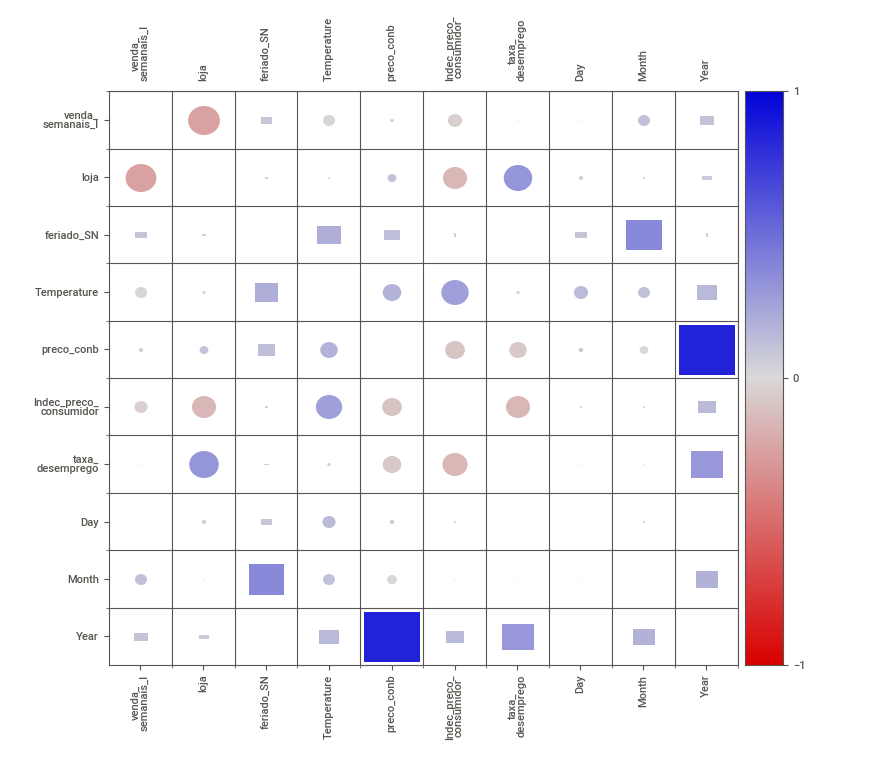
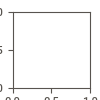

In [ ]:
eda = sv.analyze(source = df_clean, target_feat = 'venda_semanais_l')
eda.show_notebook()

In [ ]:
df_clean

loja  venda_semanais_l  feriado_SN  Temperature  preco_conb  \
0        1         16.436909           0        42.31       2.572   
1        1         16.419574           1        38.51       2.548   
2        1         16.119682           0        39.93       2.514   
3        1         14.097276           0        46.63       2.561   
4        1         15.548067           0        46.50       2.625   
...    ...               ...         ...          ...         ...   
6430    45          7.131739           0        64.88       3.997   
6431    45          7.334551           0        64.89       3.985   
6432    45          7.344644           0        54.47       4.000   
6433    45          7.181255           0        56.47       3.969   
6434    45          7.602814           0        58.85       3.882   

      Indec_preco_consumidor  taxa_desemprego  Day  Month  Year  
0                   2.110964            8.106    2      5  2010  
1                   2.112422            8.106    2     12  2010  
2                   2.112891            8.106   19      2  2010  
3                   2.113196            8.106   26      2  2010  
4                   2.113501            8.106    3      5  2010  
...                      ...              ...  ...    ...   ...  
6430                1.920136            8.684   28      9  2012  
6431                1.921704            8.667   10      5  2012  
6432                1.923273            8.667   10     12  2012  
6433                1.923309            8.667   19     10  2012  
6434                1.923089            8.667   26     10  2012  

[5658 rows x 10 columns]

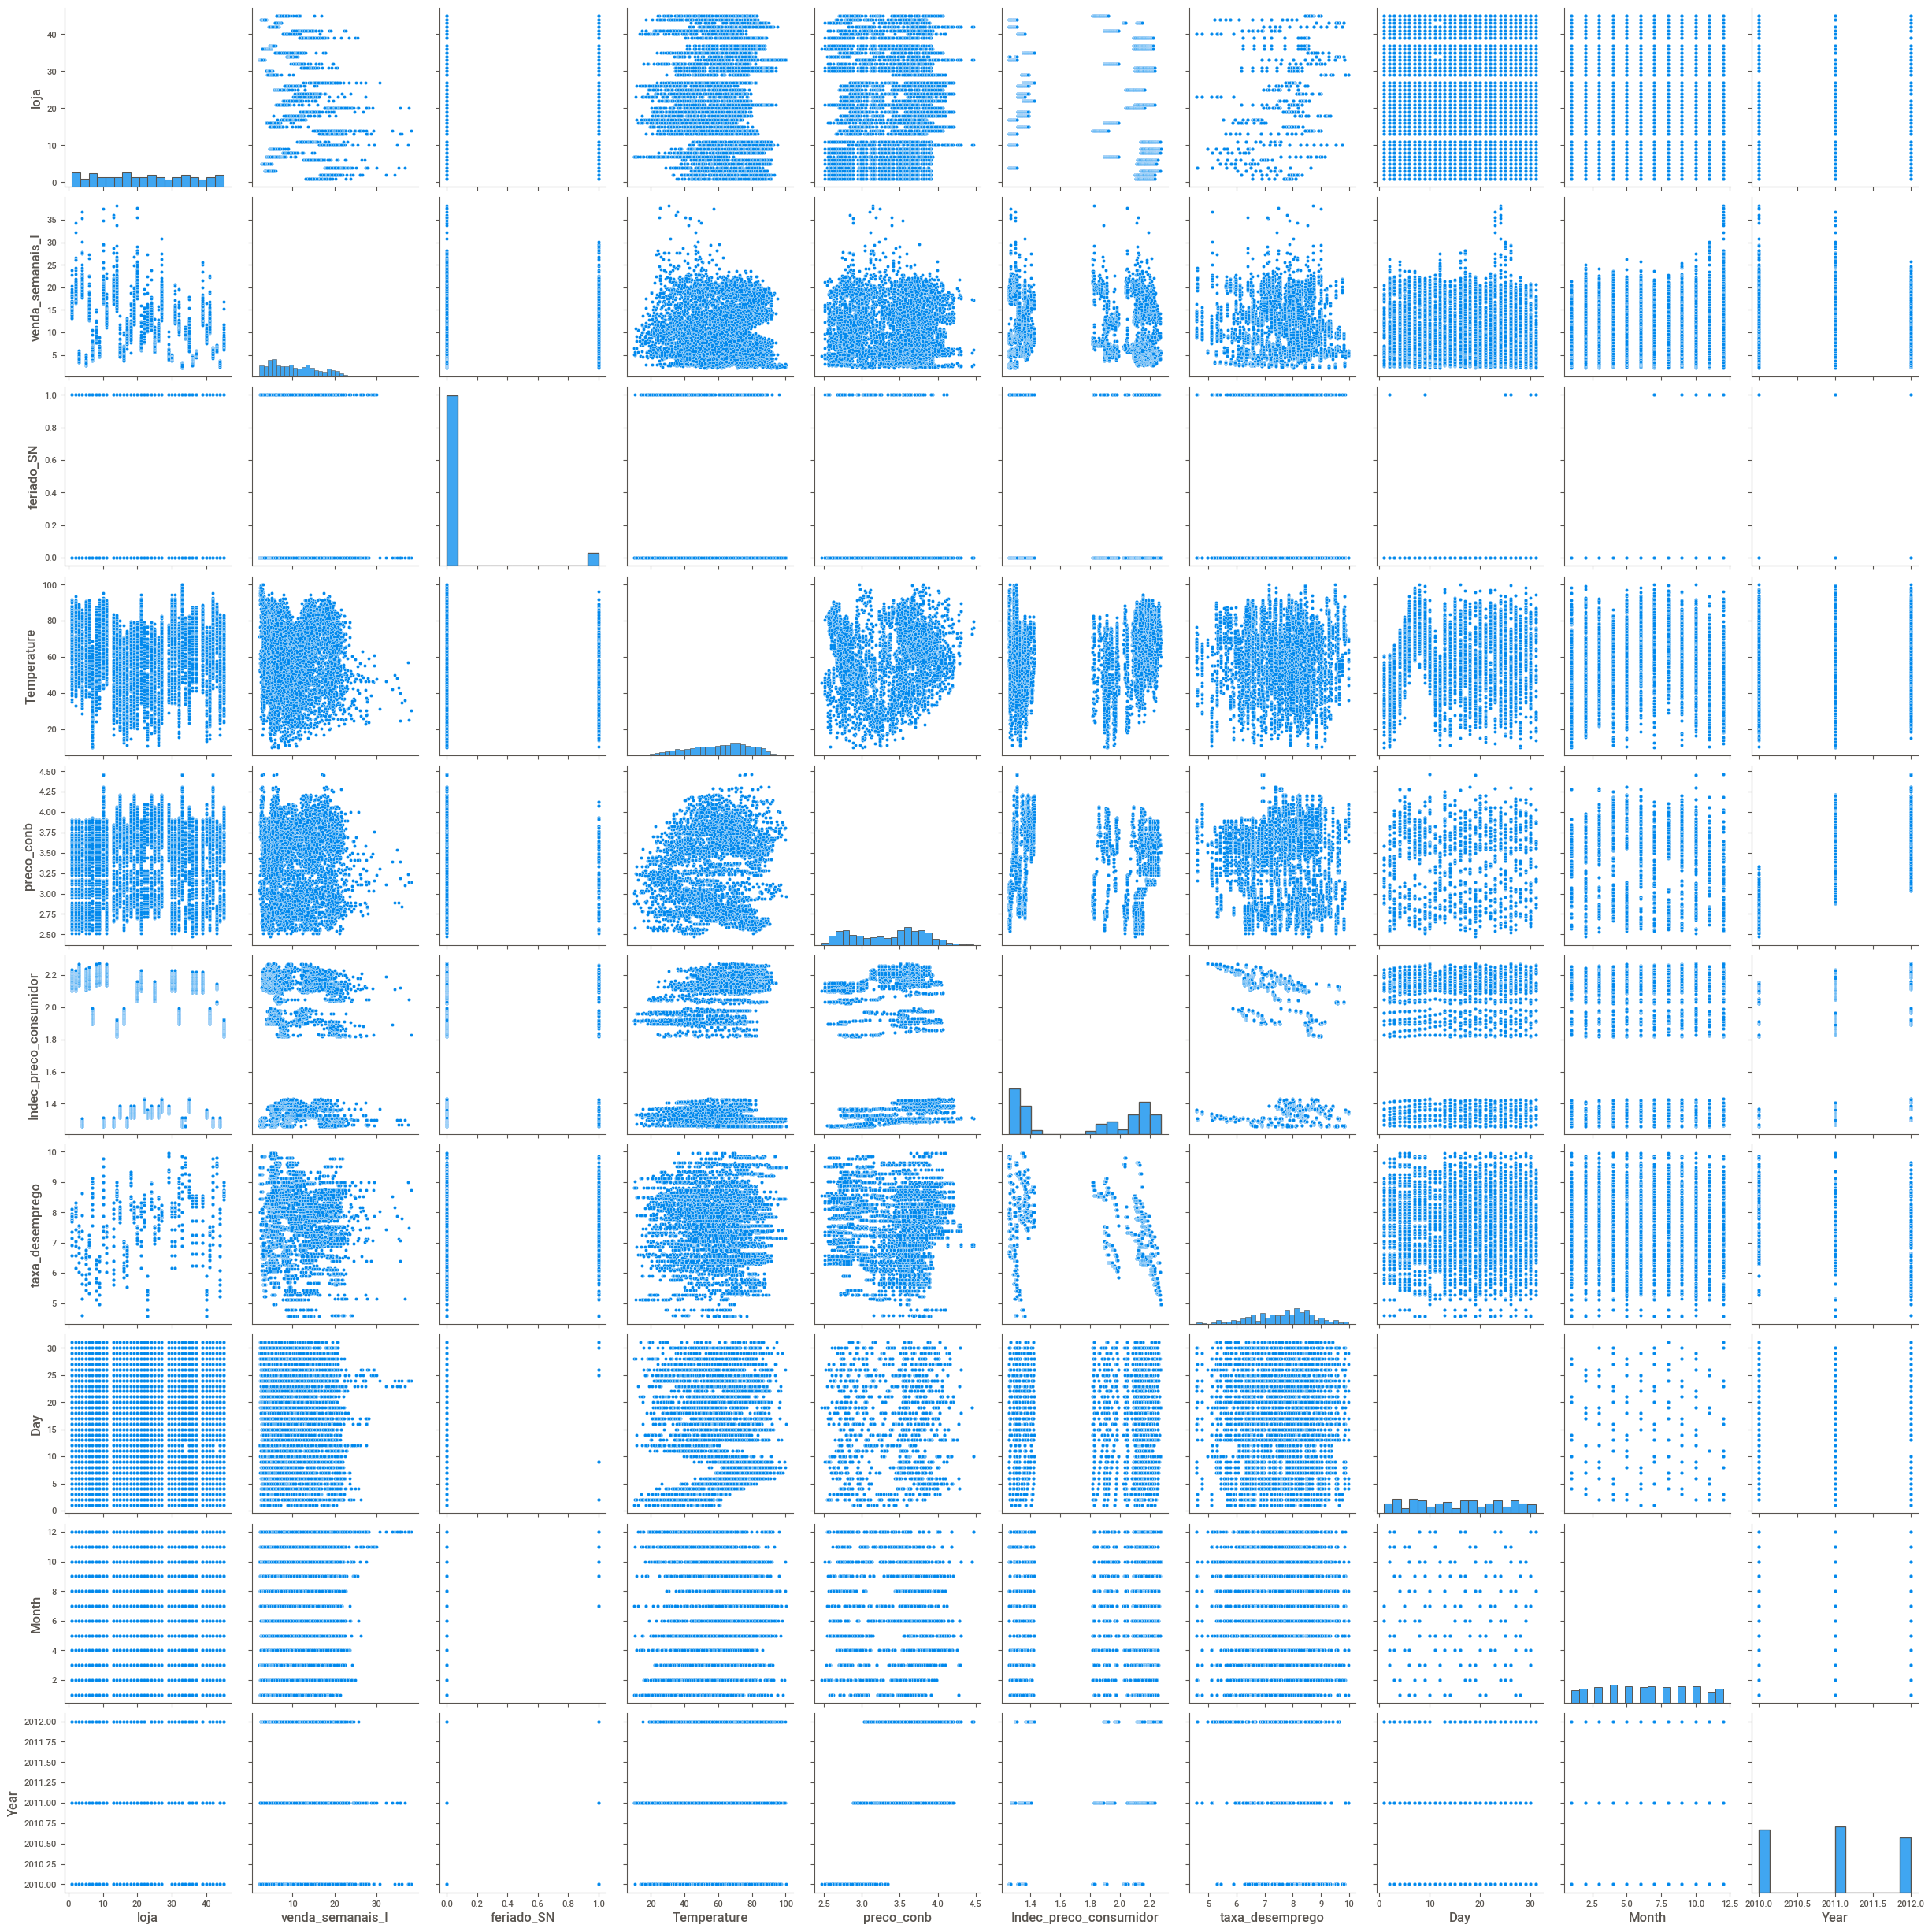

In [ ]:
sns.pairplot(df_clean)

In [ ]:
df_clean.columns.rename(1)

Index(['loja', 'venda_semanais_l', 'feriado_SN', 'Temperature', 'preco_conb',
       'Indec_preco_consumidor', 'taxa_desemprego', 'Day', 'Month', 'Year'],
      dtype='object', name=1)

Logo abaixo foi necessário padronizar as esclas para se trabalhar no modelo

In [ ]:
from sklearn.preprocessing import StandardScaler # banco de dados padronizado, agrupando escala

scaler = StandardScaler().fit(df_clean)
dfmod=scaler.fit_transform(df_clean)
dfmod=pd.DataFrame(dfmod,index=df_clean.index,columns=df_clean.columns) # indexando nomes das coluns do antigo dataframe para o novo dataframe
dfmod






loja  venda_semanais_l  feriado_SN  Temperature  preco_conb  \
0    -1.629331          1.010513   -0.273210    -0.982323   -1.673292   
1    -1.629331          1.007507    3.660184    -1.189927   -1.725725   
2    -1.629331          0.955504   -0.273210    -1.112349   -1.800004   
3    -1.629331          0.604809   -0.273210    -0.746310   -1.697324   
4    -1.629331          0.856383   -0.273210    -0.753413   -1.557504   
...        ...               ...         ...          ...         ...   
6430  1.741440         -0.603051   -0.273210     0.250735    1.439879   
6431  1.741440         -0.567883   -0.273210     0.251281    1.413663   
6432  1.741440         -0.566133   -0.273210    -0.317991    1.446434   
6433  1.741440         -0.594465   -0.273210    -0.208726    1.378708   
6434  1.741440         -0.521365   -0.273210    -0.078700    1.188641   

      Indec_preco_consumidor  taxa_desemprego       Day     Month      Year  
0                   0.894844         0.439795 -1.557830 -0.441469 -1.198436  
1                   0.898594         0.439795 -1.557830  1.672266 -1.198436  
2                   0.899803         0.439795  0.383574 -1.347355 -1.198436  
3                   0.900587         0.439795  1.182975 -1.347355 -1.198436  
4                   0.901372         0.439795 -1.443629 -0.441469 -1.198436  
...                      ...              ...       ...       ...       ...  
6430                0.403967         0.966269  1.411376  0.766380  1.305534  
6431                0.408002         0.950785 -0.644228 -0.441469  1.305534  
6432                0.412037         0.950785 -0.644228  1.672266  1.305534  
6433                0.412129         0.950785  0.383574  1.068342  1.305534  
6434                0.411565         0.950785  1.182975  1.068342  1.305534  

[5658 rows x 10 columns]

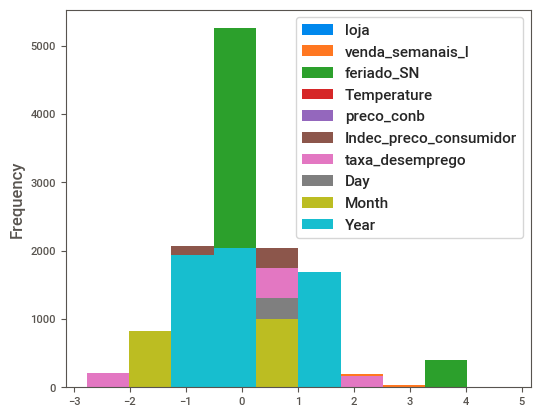

In [ ]:
dfmod.plot(kind = 'hist', figsize=(6,5)); # distrbuição dos dados padronizado

##**MODELAGEM**

Nessa etapa foi executado alguns modelos individuais para verificar sua métricas individuais em relação ao comportamento de treino e teste

MODELO DE REGRESSÃO LINEAR (RL)

In [ ]:
# IMPORTANDO MODELO E MÉTRICA PARA REGRESSÃO LINEAR

from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error, r2_score,mean_squared_log_error, mean_absolute_error
from sklearn.linear_model import LinearRegression




In [ ]:
# RODANDO O MODELO COM TÉCNICA DE VALIDAÇÃO: Holdout Repetido

R = 10
eqms = []
maes = []
R2=[]

X = dfmod[['loja', 'feriado_SN','Temperature','preco_conb','taxa_desemprego','Day','Month','Year']]
y = dfmod['venda_semanais_l'] 


for i in range(R):
    Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)
    reg = LinearRegression()
    reg.fit(Xtreino, ytreino)
    preditos = reg.predict(Xteste)
    eqm = mean_squared_error(yteste, preditos)
 
    mae = np.mean(abs(yteste - preditos))
    r2=r2_score(yteste, preditos)
    eqms.append(eqm)
    maes.append(mae)
   
    R2.append(r2)
  
    
print('eqm:',np.mean(eqms))
print('mae:',np.mean(maes))

print('R2', np.mean(r2))
    





eqm: 0.8976087198766889
mae: 0.7865141919276841
R2 0.11539612168022051


MODELO DE KNN= VIZINHOS MAIS PRÓXIMOS

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

R = 10
eqm_teste = []
eqm_treino = []
maes = []

R2=[]

X = dfmod[['loja', 'feriado_SN','Temperature','preco_conb','taxa_desemprego','Day','Month','Year']]
y = dfmod['venda_semanais_l'] 

k = 400

R = 50

for i in range(R):
    Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(Xtreino, ytreino)
    preditos = knn.predict(Xteste)
    eqm_teste = mean_squared_error(yteste, preditos)
    preditos_treino = knn.predict(Xtreino)
    eqm_treino = mean_squared_error(preditos_treino, ytreino)

   
    mae = np.mean(abs(yteste - preditos))
    r2=r2_score(yteste, preditos)
    eqms.append(eqm_teste)
    eqms.append(eqm_treino)

    maes.append(mae)
   
    R2.append(r2)
  
    
print('eqm_teste:',np.mean(eqm_teste))
print('eqm_treino:',np.mean(eqm_treino))
print('mae_teste:',np.mean(maes))

print('R2_teste', np.mean(r2))

eqm_teste: 0.9574797149841839
eqm_treino: 0.8632011826731141
mae_teste: 0.7955663361469857
R2_teste 0.10251150677490051


MODELO DE ÁRVORE DE DECISÃO

In [ ]:
from sklearn.tree import DecisionTreeRegressor

eqm_teste = []
eqm_treino = []
maes = []

R2=[]

X = dfmod[['loja', 'feriado_SN','Temperature','preco_conb','taxa_desemprego','Day','Month','Year']]
y = dfmod['venda_semanais_l'] 

profundidade = 5

R = 100
eqms_treino = []
eqms_teste = []



for i in range(R):
    Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)

    arvore = DecisionTreeRegressor(max_depth = profundidade)
    arvore.fit(Xtreino, ytreino) 
    preditos = arvore.predict(Xteste)
    eqm_teste = mean_squared_error(yteste, preditos)
    preditos_treino = arvore.predict(Xtreino)
    eqm_treino = mean_squared_error(preditos_treino, ytreino)

   
    mae = np.mean(abs(yteste - preditos))
    r2=r2_score(yteste, preditos)
    eqms.append(eqm_teste)
    eqms.append(eqm_treino)

    maes.append(mae)
    
    R2.append(r2)
    

print('eqm_teste:',np.mean(eqm_teste))
print('eqm_treino:',np.mean(eqm_treino))
print('mae_teste:',np.mean(maes))

print('R2_teste', np.mean(r2))
  

eqm_teste: 0.4302703060816818
eqm_treino: 0.35302882658755375
mae_teste: 0.4197705472649122
R2_teste 0.5842354105444643


MODELO RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestRegressor


R = 10
eqms = []
maes = []

R2=[]

X = dfmod[['loja', 'feriado_SN','Temperature','preco_conb','taxa_desemprego','Day','Month','Year']]
y = dfmod['venda_semanais_l'] 

for i in range(R):
    Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)
    rf = RandomForestRegressor( max_depth=2)
    rf.fit(Xtreino, ytreino)
    preditos = rf.predict(Xteste)
    eqm_teste = mean_squared_error(yteste, preditos)
    preditos_treino = rf.predict(Xtreino)
    eqm_treino = mean_squared_error(preditos_treino, ytreino)

    mae = np.mean(abs(yteste - preditos))
    r2=r2_score(yteste, preditos)
    eqms.append(eqm_teste)
    eqms.append(eqm_treino)

    maes.append(mae)
    
    R2.append(r2)
  
    
print('eqm_teste:',np.mean(eqm_teste))
print('eqm_treino:',np.mean(eqm_treino))
print('mae_teste:',np.mean(maes))

print('R2_teste', np.mean(r2))

eqm_teste: 0.7732159921787143
eqm_treino: 0.7881916175000466
mae_teste: 0.7300137777122407
R2_teste 0.22694537847092666


COMPARAÇÃO DE MODELOS

Nessa etapa foi comparado os modelos de forma conjunta usando um holdout repetido>

In [ ]:
def HoldoutRepetido(modelo, replicas = 100, proporcao = 0.25): 

    eqms_treino = []
    eqms_teste = []
   
    X = dfmod[['loja', 'feriado_SN','Temperature','preco_conb','taxa_desemprego','Day','Month','Year']]
    y = dfmod['venda_semanais_l'] 

    for i in range(replicas):
        Xtreino , Xteste, ytreino, yteste  = train_test_split(X, y, test_size = proporcao)
        
        #Treinando o Modelo
        reg = modelo
        reg.fit(Xtreino, ytreino)

        #Verificando o eqm no teste
        preditos_treino = reg.predict(Xtreino) 
        eqm_treino = mean_squared_error(ytreino, preditos_treino)

        preditos_teste = reg.predict(Xteste)
        eqm_teste = mean_squared_error(yteste, preditos_teste)
      

        #Guardando o resultado
        eqms_treino.append(eqm_treino)
        eqms_teste.append(eqm_teste)
    
    res_treino = np.array(eqms_treino).mean().round(2)
    res_teste = np.array(eqms_teste).mean().round(2)

    print('EQM médio de TREINO: {}'.format(res_treino))
    print('EQM médio de TESTE: {}'.format(res_teste))
  

    return res_treino, res_teste 

In [ ]:
HoldoutRepetido(modelo = LinearRegression())

EQM médio de TREINO: 0.88
EQM médio de TESTE: 0.89


(0.88, 0.89)

In [ ]:
HoldoutRepetido(KNeighborsRegressor())

EQM médio de TREINO: 0.55
EQM médio de TESTE: 0.82


(0.55, 0.82)

In [ ]:
HoldoutRepetido(DecisionTreeRegressor( max_depth = 8,min_samples_split=3)) # 2 melhor modelo

EQM médio de TREINO: 0.07
EQM médio de TESTE: 0.1


(0.07, 0.1)

In [ ]:
HoldoutRepetido(RandomForestRegressor( max_depth=7,)) # 1 melhor modelo

EQM médio de TREINO: 0.1
EQM médio de TESTE: 0.12


(0.1, 0.12)

In [ ]:
# Aqui doi gwrado uma lista dos melhores modelos
X = df_clean[['loja', 'feriado_SN','Temperature','preco_conb','taxa_desemprego','Day','Month','Year']]
y = df_clean['venda_semanais_l'] 



modelos = [LinearRegression(), 
           KNeighborsRegressor(n_neighbors = 5), 
           KNeighborsRegressor(n_neighbors = 15),
           KNeighborsRegressor(n_neighbors = 25),
           KNeighborsRegressor(n_neighbors = 35),
           KNeighborsRegressor(n_neighbors = 45),
           DecisionTreeRegressor(max_depth = 2),
           DecisionTreeRegressor(max_depth = 4, min_samples_split=2),
           DecisionTreeRegressor(max_depth = 6),
           DecisionTreeRegressor(max_depth = 8,min_samples_split=2),
           DecisionTreeRegressor(max_depth = 10),
           RandomForestRegressor( max_depth=2),
           RandomForestRegressor( max_depth=5),
           RandomForestRegressor( max_depth=7,min_samples_split= 2,),
           RandomForestRegressor( max_depth=9),
           RandomForestRegressor( max_depth=11)]

nomes = ['Regressão Linear',
         'KNN - K = 5', 
         'KNN - K = 15', 
         'KNN - K = 25', 
         'KNN - K = 35', 
         'KNN - K = 45',
         'Árvore - Prof = 2',
         'Árvore - Prof = 4',
         'Árvore - Prof = 6',
         'Árvore - Prof = 8',
         'Árvore - Prof = 10',
         'Randomforest_2',
         'Randomforest_5',
         'Randomforest_7',
         'Randomforest_9',
         'Randomforest_11']
         

treinos = []
testes = []

for modelo in modelos:
    resultados = HoldoutRepetido(modelo)
    treinos.append(resultados[0])
    testes.append(resultados[1])

aux = {'EQM Treino': treinos, 'EQM Teste': testes}
resultados = pd.DataFrame(aux, index = nomes)
resultados.sort_values(by = 'EQM Teste')

EQM médio de TREINO: 0.88
EQM médio de TESTE: 0.89
EQM médio de TREINO: 0.55
EQM médio de TESTE: 0.82
EQM médio de TREINO: 0.68
EQM médio de TESTE: 0.79
EQM médio de TREINO: 0.73
EQM médio de TESTE: 0.8
EQM médio de TREINO: 0.76
EQM médio de TESTE: 0.8
EQM médio de TREINO: 0.77
EQM médio de TESTE: 0.81
EQM médio de TREINO: 0.8
EQM médio de TESTE: 0.81
EQM médio de TREINO: 0.54
EQM médio de TESTE: 0.55
EQM médio de TREINO: 0.21
EQM médio de TESTE: 0.23
EQM médio de TREINO: 0.06
EQM médio de TESTE: 0.1
EQM médio de TREINO: 0.02
EQM médio de TESTE: 0.09
EQM médio de TREINO: 0.79
EQM médio de TESTE: 0.8
EQM médio de TREINO: 0.3
EQM médio de TESTE: 0.31
EQM médio de TREINO: 0.1
EQM médio de TESTE: 0.12
EQM médio de TREINO: 0.03
EQM médio de TESTE: 0.07
EQM médio de TREINO: 0.02
EQM médio de TESTE: 0.06


EQM Treino  EQM Teste
Randomforest_11           0.02       0.06
Randomforest_9            0.03       0.07
Árvore - Prof = 10        0.02       0.09
Árvore - Prof = 8         0.06       0.10
Randomforest_7            0.10       0.12
Árvore - Prof = 6         0.21       0.23
Randomforest_5            0.30       0.31
Árvore - Prof = 4         0.54       0.55
KNN - K = 15              0.68       0.79
KNN - K = 25              0.73       0.80
KNN - K = 35              0.76       0.80
Randomforest_2            0.79       0.80
KNN - K = 45              0.77       0.81
Árvore - Prof = 2         0.80       0.81
KNN - K = 5               0.55       0.82
Regressão Linear          0.88       0.89

COMBINAÇÃO DE MODELOS 

Nessa etapa foi feito uma combinação de modelos por voto com o onjetivo de melhorar as métricas, no entanto, tal onjetivo não foi alcançado.

In [ ]:
# Combinação por voto 
from sklearn.ensemble import  VotingRegressor
reg_lin = LinearRegression()
knn =  KNeighborsRegressor(n_neighbors=10)
arvore = DecisionTreeRegressor(max_depth = 8,min_samples_split=2)
RF= RandomForestRegressor( max_depth=7,min_samples_split=2)
X = dfmod[['loja', 'feriado_SN','Temperature','preco_conb','taxa_desemprego','Day','Month','Year']]
y = dfmod['venda_semanais_l'] 

modelos = [('reg_lin', reg_lin), ('knn', knn), ('arvore', arvore),('RF',RF)]
Xtreino , Xteste, ytreino, yteste  = train_test_split(X, y, test_size =0.25)
mod =  VotingRegressor(modelos)
mod.fit(Xtreino,ytreino)

preditos_teste = mod.predict(Xteste)
print('R2: {:.2f}'.format(r2_score(yteste, preditos_teste)))
print('EQM: {:.2f}'.format(mean_squared_error(yteste, preditos_teste)))
      

R2: 0.72
EQM: 0.30


Aqui foi definido o melhor modelo a ser trabalhado

In [ ]:
Melhor_modelo= RandomForestRegressor( max_depth=7,min_samples_split= 2) # aqui foi escolhido o melhor modelo e foi executado!
Melhor_modelo.fit(X,y)

RandomForestRegressor(max_depth=7)

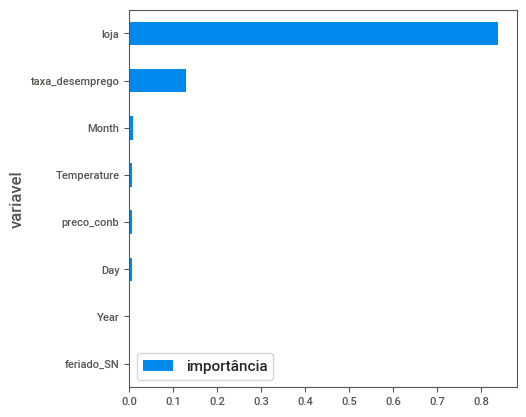

In [ ]:
# Aqui foi identificado as variáveis mais importantes para o modelo
variaveis = pd.DataFrame()
variaveis['variavel'] = X.columns
variaveis['importância'] =Melhor_modelo .feature_importances_
variaveis.sort_values(by = 'importância', ascending = True, inplace = True)
variaveis.set_index('variavel', inplace = True)
variaveis.plot(kind='barh', figsize=(5, 5));

No gráfico acima percebe-se a variável loja e a taxa de desemprego foram as  que mais contribuíram para o resultado do modelo, isso é importante para concentrar esforços nas variáveis para melhorar o modelo e também auxiliar na tomada de decisão da área de negócio.

## TUNAGEM DE HIPERPARÂMETROS


Nessa etapa busca melhorar os hiperparâmetros do modelo escoljido

In [ ]:
  from sklearn.model_selection import RandomizedSearchCV #Importando bliblioteca para tunagem
 

In [ ]:
    modelo = Melhor_modelo # definindo parametros
    parametros={ 'max_depth' : np.arange(1, 100, 2) }

                 

  
                

In [ ]:
random_search = RandomizedSearchCV(modelo, param_distributions = parametros, # rodando o modelos runado
                                   scoring ='neg_mean_squared_error', #' definindo o eqm negado
                                   cv = 20, 
                                   verbose = 1,
                                   n_iter = 20,
                                   n_jobs = -1)

In [ ]:
random_search.fit(X, y) # rodando nos dados

Fitting 20 folds for each of 20 candidates, totalling 400 fits


RandomizedSearchCV(cv=20, estimator=RandomForestRegressor(max_depth=7),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99])},
                   scoring='neg_mean_squared_error', verbose=1)

In [ ]:
random_search.cv_results_['mean_test_score'] # resulltado dos scores!

array([-1.1687758 , -1.16458573, -1.14693433, -1.17032041, -1.25066831,
       -1.16734521, -1.15115288, -1.16130788, -1.16648478, -1.15214637,
       -1.15131555, -1.15359966, -1.15648407, -1.14326003, -1.14985726,
       -1.14191883, -1.16246689, -1.15866959, -1.13894712, -1.15080452])

In [ ]:
random_search.best_score_ # melhor score

-1.1389471249751904

In [ ]:
random_search.best_params_ # melhor parametro

{'max_depth': 95}

 Aqui verificou-se que a tunagem teve pouca influência no modelo

###PREDIÇÃO

Aqui foi escolhido o modelo Rando Forest commo melhor modelo performático

In [ ]:
Melhor_modelo.fit(X,y)


RandomForestRegressor(max_depth=7)

In [ ]:
dfmod.columns

Index(['loja', 'venda_semanais_l', 'feriado_SN', 'Temperature', 'preco_conb',
       'Indec_preco_consumidor', 'taxa_desemprego', 'Day', 'Month', 'Year'],
      dtype='object')

In [ ]:
pred=Melhor_modelo.predict(Xteste) # melhor modelo preditos nos dados de teste
pred

array([ 0.67913128,  0.70634305,  1.36963282, ..., -0.27710685,
       -1.40137475,  0.44689276])

O código abaixo, explica o resultado dos predito(Previsões) e dos teste(gabarito)

In [ ]:
gabarito = pd.DataFrame({'Gabarito': yteste,'Previsoes_da_Máquina': pred})
gabarito

Gabarito  Previsoes_da_Máquina
774   0.654642              0.679131
843   0.890293              0.706343
1802  1.343402              1.369633
3437 -0.694183             -0.267544
1304  1.509427              1.499826
...        ...                   ...
6382 -0.484233             -0.510500
1882  1.854297              1.614333
3695  0.011040             -0.277107
4646 -1.391605             -1.401375
4573  0.200694              0.446893

[1415 rows x 2 columns]

In [ ]:
gabarito.to_pickle('prediçao_3 de modelo de vendas pkl') #arquivo salvo em pçl para produção

In [ ]:
gabarito.to_csv('prediçao modelo de vendas 01.csv', index = False) # arquivo salvo em csv

#CONSIDERAÇÕES FINAIS

- O objetivo desse projeto foi fazer um modelo de previsão de vendas com base nos dados da quantidade de vendas de determinadad lojas, o modelo escolhido foi um Randoforest por apresentar melhor  robutez ao outilier.
- Este projeto tem um viés educativo e de treinamento para desenvolvimento de habilidades técnicas no que se refere à aprendizado de máquinas.
- Este projeto apresentou etapas importantes no tratamento dos dados, insights de negócios preliminares, preprocessamento e tratamento dos dados, além de técnicas de modelagem.



